# Linear Algebra Crash Course (with Python) Class 10


## Chap 9 Conti

## 用随机矩阵测试SVD

In [2]:
import numpy as np
#prompt: use np to generate a 10x10 matrix with integer entries
M = np.random.randint(low=0, high=5, size=(10, 10))
print(M)

[[0 3 4 2 3 0 0 0 0 1]
 [2 2 3 0 4 2 2 4 4 0]
 [2 0 4 2 1 1 1 3 0 4]
 [4 4 2 4 0 0 0 3 0 1]
 [4 3 1 1 2 4 4 3 4 0]
 [0 4 3 4 4 2 3 1 2 4]
 [0 4 1 4 0 3 3 1 2 4]
 [4 1 4 0 4 2 2 4 2 4]
 [4 0 0 2 2 3 0 3 3 1]
 [0 3 1 3 1 2 1 4 2 3]]


In [10]:
#prompt:use svd and einsum to gain the reduced matrix
# Perform Singular Value Decomposition (SVD)
U, sigma, VT = np.linalg.svd(M)

# Set the desired rank(秩) for the reduced matrix
rank = 5
# Reconstruct the reduced matrix using the selected rank
reducedM = np.einsum('ij,j,jk->ik', U[:, :rank], sigma[:rank], VT[:rank, :])
print("\nReduced Matrix:")
print(M-reducedM)


print("\nSingular Values:")
print(sigma)
# prompt:use np to compute the maximum for the absolute value of a matrix
# Compute maximum absolute value of the matrix
max_abs_value = np.max(np.abs(M-reducedM))
print("\nMaximum Absolute Difference:", max_abs_value)

# Compute the Frobenius norm of the matrix
frobenius_norm = np.linalg.norm(M-reducedM, ord='fro')
print("\nFrobenius Norm of difference:", frobenius_norm)
print("\nFrobenius Norm of original matrix:", np.linalg.norm(M, ord='fro'))


Reduced Matrix:
[[ 7.36481185e-01 -9.27392601e-02 -2.21364647e-01 -1.17513266e-03
   1.98605112e-02  2.35973496e-01 -1.71052311e-01  1.29747864e-02
  -5.99955208e-02 -5.69369223e-01]
 [ 6.83556196e-01  1.90142496e-01 -3.24771079e-01  4.89224181e-01
  -6.15661681e-01 -9.81814089e-02 -3.53412927e-01  1.27346007e-01
  -4.32383271e-01  2.51251625e-01]
 [-7.98737213e-01  4.82095688e-01  1.53450976e+00 -5.76458346e-01
  -7.38471599e-01 -2.33929746e-01 -2.85035555e-01  7.75783151e-01
  -1.50107163e+00  6.81624460e-01]
 [-5.35371249e-01  8.55168234e-02  1.93821685e-01 -8.16434588e-02
   8.79176752e-02 -2.66098347e-01  1.99384787e-01 -1.12193673e-01
   1.12144791e-01  3.86710678e-01]
 [ 5.71235620e-01  1.84234015e-01  1.04504774e-01 -2.96344998e-02
  -2.44286937e-01 -1.62670745e-01 -1.92231991e-01  1.81183450e-02
  -4.22060671e-01 -8.44644197e-02]
 [ 1.04599375e-01 -2.66131257e-01 -2.52146502e-01  1.81834191e-01
  -1.11883017e-01  6.19683073e-01 -2.02233697e-01  3.66618367e-01
  -5.51334723e-0

In [11]:
U2, sigma2, VT2 = np.linalg.svd(reducedM)
print("\nSingular Values:")
print(sigma2)


Singular Values:
[2.13565018e+01 6.42751961e+00 6.11006504e+00 5.44074592e+00
 3.84992107e+00 1.09987108e-15 6.52517038e-16 4.90310687e-16
 2.72593069e-16 5.36294567e-17]


In [16]:
# Set the print options to display three decimal places
np.set_printoptions(precision=3, suppress=True)
print(U-U2)
print(U+U2)
#这里可以看到 SVD 的唯一性，以及特征值相同，取正交基底的随意性。

[[ 0.    -0.     0.     0.    -0.293  0.564 -0.456  0.026  0.543 -0.316]
 [ 0.     0.    -0.     0.    -0.756 -0.716 -0.455 -0.008 -0.401 -0.243]
 [ 0.    -0.    -0.    -0.     0.246 -0.689 -0.355 -0.235  0.229  0.417]
 [ 0.    -0.     0.     0.     0.059 -0.352  0.285  0.111 -0.423  0.205]
 [ 0.     0.     0.    -0.     0.933 -0.135 -0.512  0.085 -0.033 -0.146]
 [ 0.     0.    -0.    -0.    -0.618  0.514 -0.048 -0.246  0.815 -0.211]
 [ 0.    -0.    -0.    -0.     1.377  0.209  0.096 -0.295  0.264 -0.207]
 [ 0.     0.     0.     0.    -0.223 -0.306  1.305 -0.667  0.021  0.559]
 [ 0.     0.    -0.     0.     0.235  0.095  0.758  0.666 -0.391  0.103]
 [ 0.     0.    -0.     0.    -0.154  0.789 -0.138  0.501 -0.604  0.003]]
[[-0.755  1.037  0.658 -0.866 -0.    -0.26  -0.025 -0.192  0.139 -0.204]
 [-0.809 -0.376 -0.178 -0.342 -0.     0.611 -0.186 -0.279 -1.006  0.217]
 [-0.588 -0.578  0.074 -0.413 -0.    -0.69   0.166  1.21   0.213 -0.434]
 [-0.507  0.278  1.439  1.034  0.     0.2    0.128

In [12]:
R = np.random.rand(50, 50) -0.5

In [13]:
import matplotlib.pyplot as plt
U, sigma, VT = np.linalg.svd(R)

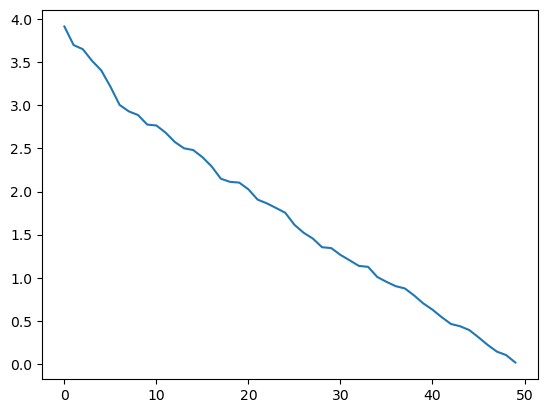

In [15]:
plt.plot(sigma[:])
plt.show()

### SVD应用于图片压缩

In [16]:
from PIL import Image
import math

In [17]:
def imgCompress(channel,percent):
    U, sigma, VT = np.linalg.svd(channel)
    m = U.shape[0]
    n = VT.shape[0]
    reChannel = np.zeros((m,n))
# 逐渐添加奇异值
    for k in range(len(sigma)):
        reChannel = reChannel + sigma[k]* np.dot(U[:,k].reshape(m,1),VT[k,:].reshape(1,n))
        if float(k)/len(sigma) > percent:
            # normalized rechannel and exit
            reChannel[reChannel < 0] = 0
            reChannel[reChannel > 255] = 255
            break

    return np.rint(reChannel).astype("uint8")

In [18]:
# 使用 einsum 得到更简洁可读的程式
def imgCompress2(channel,percent):
    U, sigma, VT = np.linalg.svd(channel)
    rank = math.ceil(len(sigma)*percent)
    
    reChannel = np.einsum('ij,j,jk->ik', U[:, :rank], sigma[:rank], VT[:rank, :])
    reChannel[reChannel < 0] = 0
    reChannel[reChannel > 255] = 255

    return np.rint(reChannel).astype("uint8")

In [19]:
oriImage = Image.open(r'./images/bird.png', 'r')
## first r stands for raw string
imgArray = np.array(oriImage)

R = imgArray[:, :, 0]
G = imgArray[:, :, 1]
B = imgArray[:, :, 2]
A = imgArray[:, :, 3]

In [20]:
print(imgArray.shape)

(1024, 960, 4)


In [21]:
# 取前p比例的奇异值,并储存其还原出来的矩阵
for p in [0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
#for p in [0.001,0.005,0.01]:
    reR = imgCompress(R, p)
    reG = imgCompress(G, p)
    reB = imgCompress(B, p)
    reA = imgCompress(A, p)
    reI = np.stack((reR, reG, reB, reA), 2)

    Image.fromarray(reI).save("./images/bird"+"{}".format(p)+"img.png")

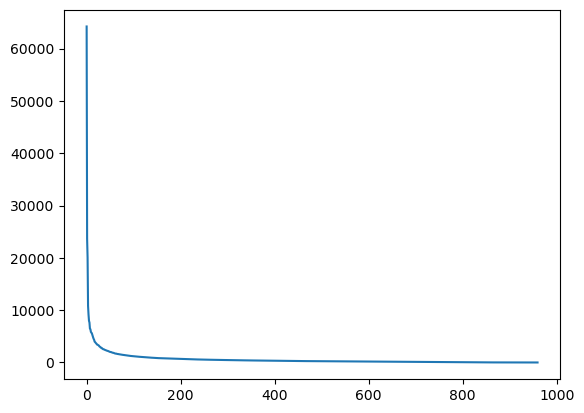

In [45]:
import matplotlib.pyplot as plt
U, sigma, VT = np.linalg.svd(R)
plt.plot(sigma)
plt.show()